perform topic modeling on a small dataset in Python, you can use the Latent Dirichlet Allocation (LDA) algorithm from the gensim library. LDA is a probabilistic model that assumes that each document in a dataset is a mixture of a small number of topics, and that each word in the document is generated from one of those topics.

In [36]:
import csv, pandas as pd
from gensim import corpora
import re

## Reinigung

In [37]:
# Open the CSV file and read the sentences into a list
scenario = pd.read_excel('Szenario/human_scenarios.xlsx')
scenario.drop('prompt', axis = 1)

,tag,year,scenario
0,ecology,2030,multinational negotiations for repurposing was...
1,ecology,2030,the global acknowledgement of overfishing and ...
2,ecology,2030,CoCA (Cities of Climate Action) agree on plane...
3,politics,2030,the Parliament of the Commons was established ...
4,ecology,2030,the Climate March was held in response to food...
...,...,...,...
1096,NaN,2050,humanity lives in self-imposed servitude to th...
1097,NaN,2050,the scale and speed of environmental degradati...
1098,NaN,2050,"protected lands have expanded worldwide, and s..."
1099,NaN,2050,the extinction curve is flat and many species ...


In [38]:
scenario.dropna(subset=['scenario'], inplace=True)

In [39]:
scenario['scenario'] = \
scenario['scenario'].map(lambda x: x.lower())
scenario['scenario'].head(1)

0    multinational negotiations for repurposing was...
Name: scenario, dtype: object

In [40]:
def split_sentence(sentence):
    words = sentence.split()
    unique_words = list(set(words))
    return unique_words

In [41]:
scenario['scenario_singlewords'] = scenario['scenario'].apply(split_sentence)

In [42]:
scenario['scenario_singlewords'].head(1)

0    [negotiations, and, for, multinational, fertil...
Name: scenario_singlewords, dtype: object

In [43]:
# Convert the lists in the scenario_singlewords column to tuples
scenario['scenario_singlewords'] = scenario['scenario_singlewords'].apply(tuple)

In [44]:
scenario['scenario_singlewords'] = scenario['scenario_singlewords'].apply(lambda x: [re.sub(r'[^\w\s]+', '', i) for i in x])

## Stopwords und Synonyme filtern

In [45]:
import gensim
from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import numpy as np

In [46]:
# Load English stopwords
stop_words = set(stopwords.words('english'))

# Add custom stopwords
custom_stop_words = ['new', 'use', 'lead', 'become', 'do', 'enable', 'forms', 'rise', 'increasing', 'greater', 'ha']
stop_words = stop_words.union(custom_stop_words)

In [47]:
# Create a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

# Lemmatize each word in the list of single words
scenario['scenario_singlewords'] = [[lemmatizer.lemmatize(word) for word in word_list] for word_list in scenario['scenario_singlewords']]

In [48]:
# Combine all the single words into a single list
all_words = [word for word_list in scenario['scenario_singlewords'] for word in word_list]
# Filter out stopwords
all_words = [word for word in all_words if word not in stop_words]

In [49]:
# Filter out stopwords from the list of single words
scenario['scenario_singlewords'] = [[word for word in word_list if word not in stop_words] for word_list in scenario['scenario_singlewords']]

In [50]:
scenario['scenario_singlewords']

0       [negotiation, multinational, fertiliser, fashi...
1       [framework, acknowledgement, accepted, target,...
2       [climate, guiding, planet, meeting, annual, ne...
3       [bringing, like, nation, started, un, common, ...
4       [held, climate, although, devastating, ultimat...
                              ...                        
1096    [people, life, planet, mantra, happy, selfimpo...
1097    [migration, climate, major, extreme, urban, ai...
1098    [resource, allocated, expanded, ecosystem, wor...
1099    [curve, many, previously, brink, extinction, f...
1100    [third, large, megaurban, two, population, cor...
Name: scenario_singlewords, Length: 1101, dtype: object

In [51]:
unique_words = set(all_words)
count_unique_words = len(unique_words)
print(count_unique_words)

3607


## Visualisieren

In [52]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

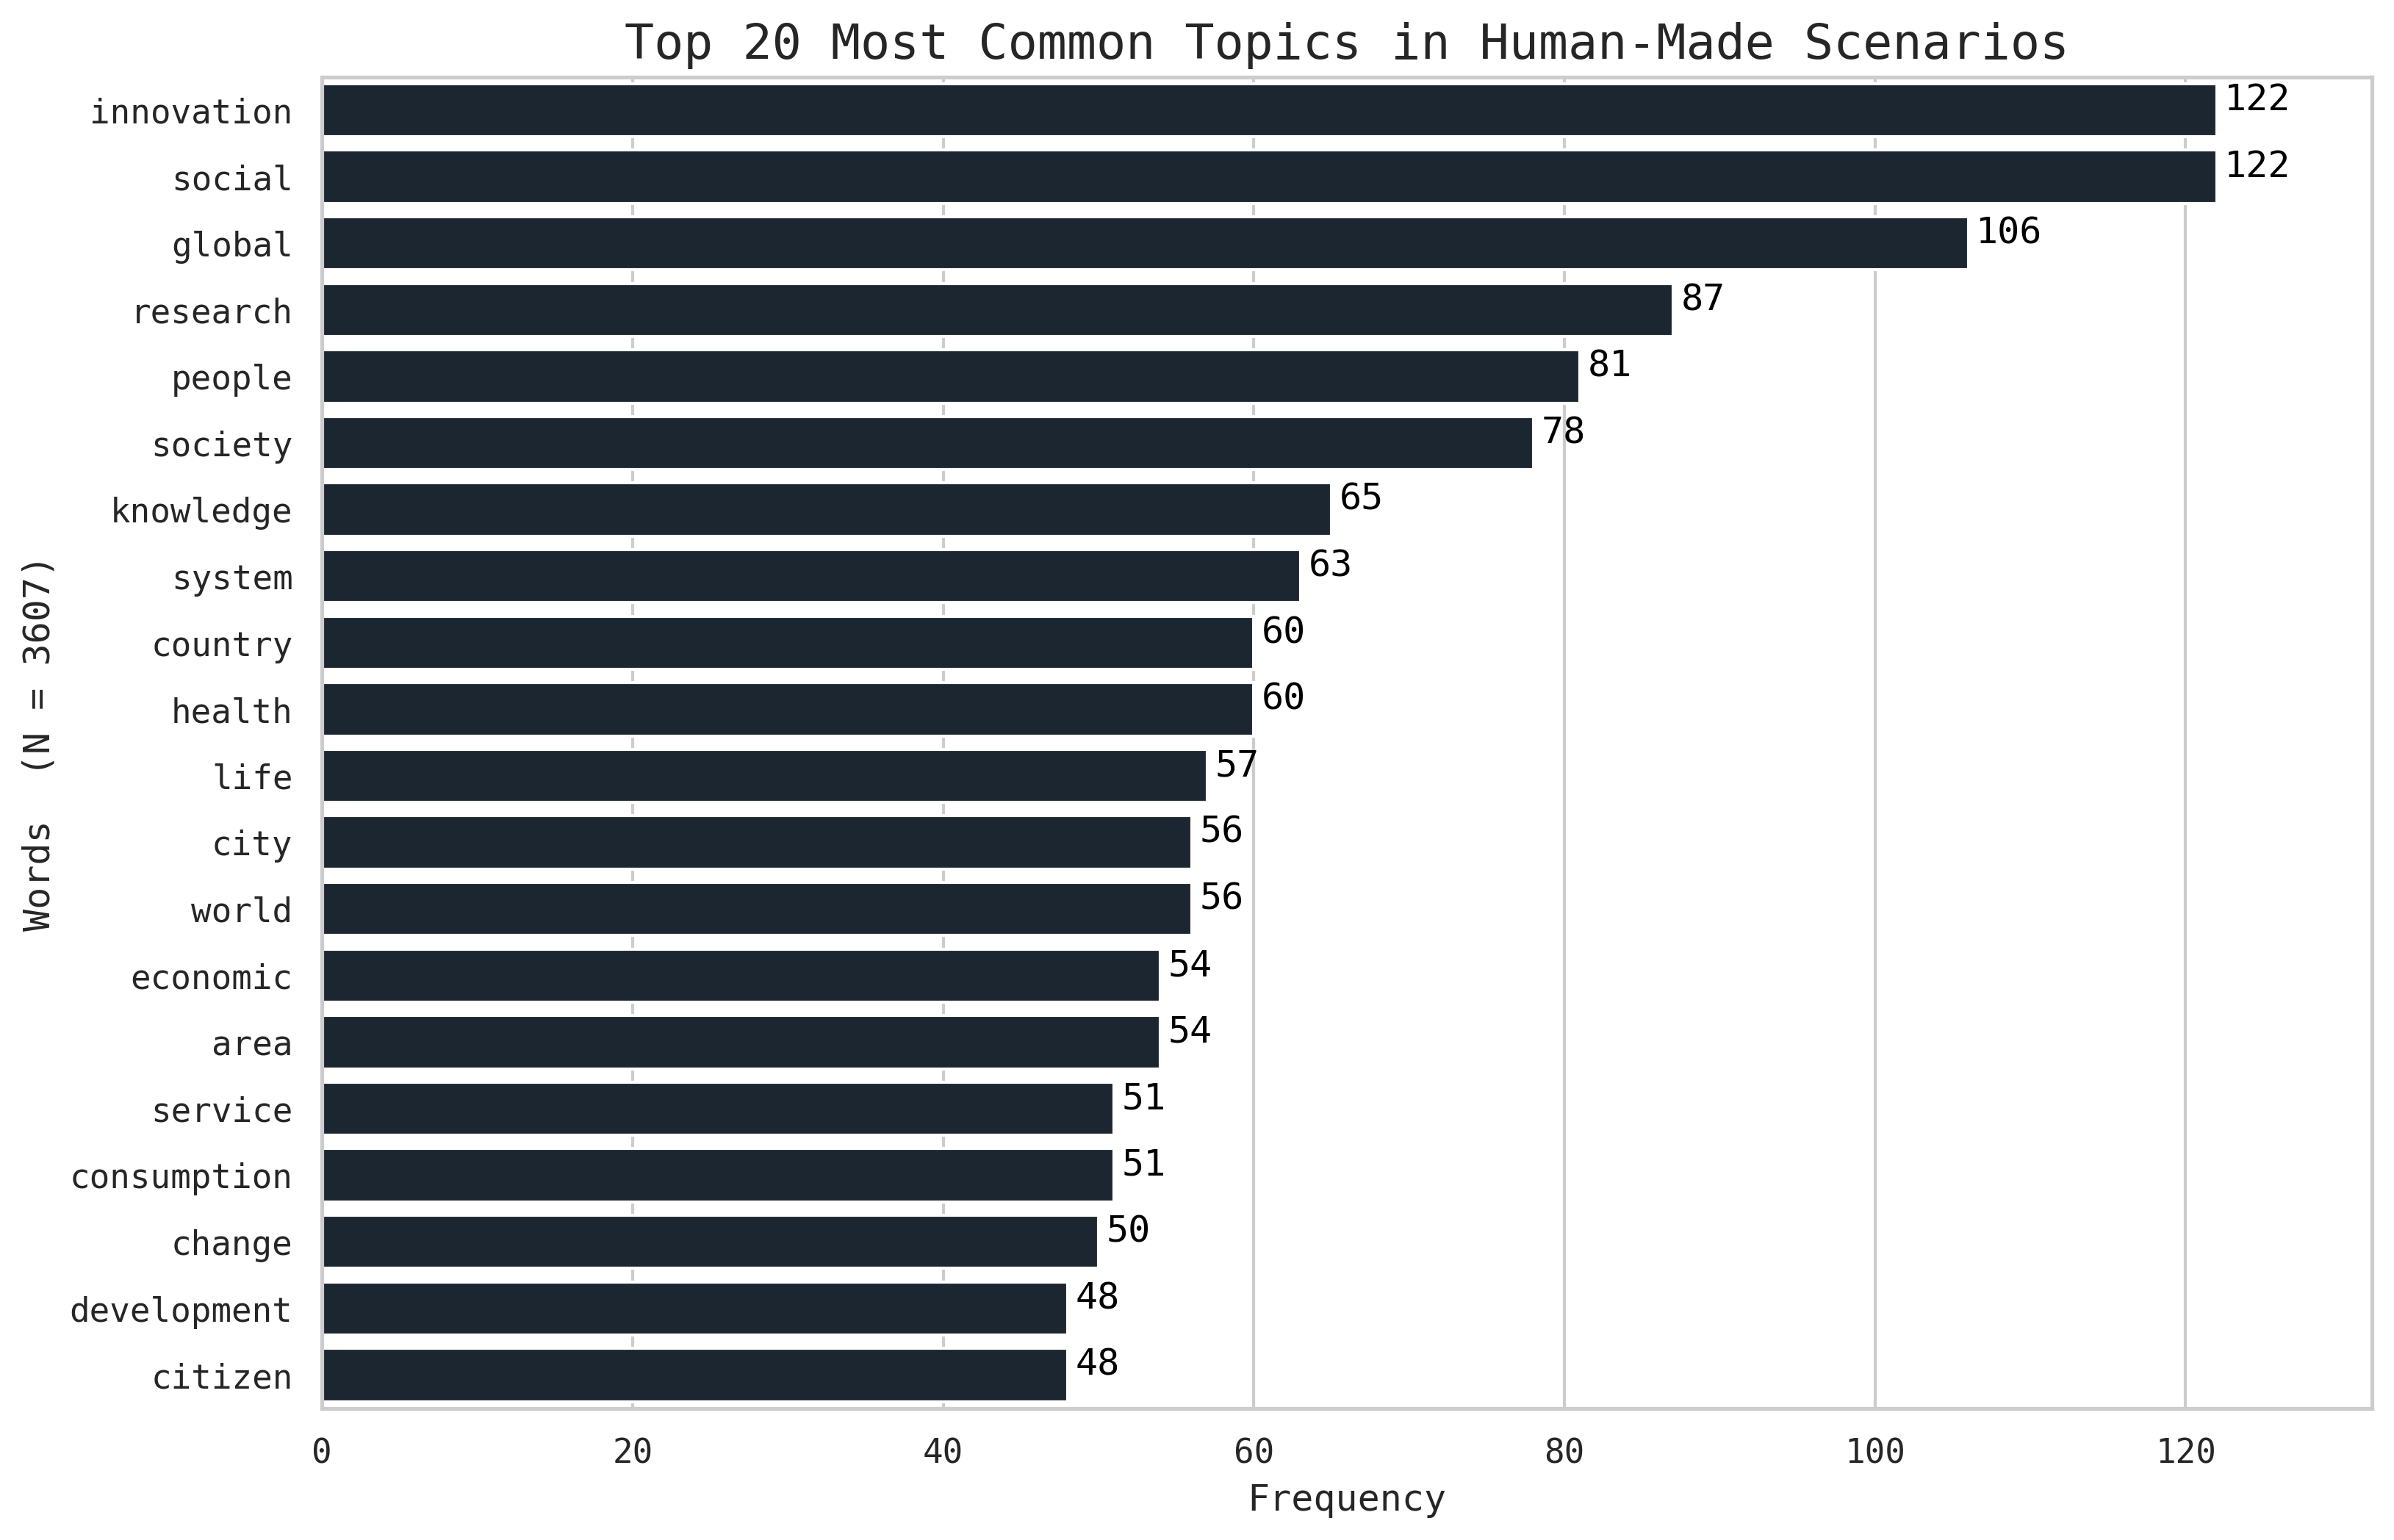

In [54]:
word_counts = Counter(all_words).most_common(20)
# Separate the words and their frequencies into separate lists
words, frequencies = zip(*word_counts)
words = list(words)
frequencies = list(frequencies)

# Set seaborn style and plot the bar chart
sns.set(style="whitegrid", font='monospace')
plt.figure(figsize=(12,8), dpi=300)
sns.barplot(x=frequencies, y=words, color="#192633") #45464c #192633 #7a96b3

# Add the frequency values as text
for i, v in enumerate(frequencies):
    plt.text(v + 0.5, i, str(v), color='black')

# Set the x-axis limit
plt.xlim(0, max(frequencies) + 10)

# Set the title and axis labels
plt.title('Top 20 Most Common Topics in Human-Made Scenarios', fontsize = 16)
plt.xlabel('Frequency')
plt.ylabel('Words  (N = 3607)')

plt.show()

# Sentiment Analyse

In [55]:
from transformers import AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from huggingface_hub import notebook_login
from transformers import AutoTokenizer
from transformers import pipeline
from datasets import load_metric
from tqdm import tqdm

In [56]:
unique_words=list(unique_words)
#unique_words

In [57]:
classifier = pipeline("sentiment-analysis",model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)
prediction = classifier(unique_words)
print(prediction)

/Users/dianakozachek/opt/anaconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[[{'label': 'sadness', 'score': 0.11096159368753433}, {'label': 'joy', 'score': 0.2032766342163086}, {'label': 'love', 'score': 0.020045194774866104}, {'label': 'anger', 'score': 0.47305992245674133}, {'label': 'fear', 'score': 0.17409680783748627}, {'label': 'surprise', 'score': 0.018559930846095085}], [{'label': 'sadness', 'score': 0.07799112051725388}, {'label': 'joy', 'score': 0.3978228271007538}, {'label': 'love', 'score': 0.012742121703922749}, {'label': 'anger', 'score': 0.35425931215286255}, {'label': 'fear', 'score': 0.14278331398963928}, {'label': 'surprise', 'score': 0.0144013287499547}], [{'label': 'sadness', 'score': 0.08131469041109085}, {'label': 'joy', 'score': 0.2572802007198334}, {'label': 'love', 'score': 0.008645041845738888}, {'label': 'anger', 'score': 0.5353161692619324}, {'label': 'fear', 'score': 0.10710932314395905}, {'label': 'surprise', 'score': 0.01033459696918726}], [{'label': 'sadness', 'score': 0.024204617366194725}, {'label': 'joy', 'score': 0.323371410

In [58]:
scenario['year']=scenario['year'].astype(int)

In [59]:
df = pd.DataFrame(prediction)
df.head()

,0,1,2,3,4,5
0,"{'label': 'sadness', 'score': 0.11096159368753...","{'label': 'joy', 'score': 0.2032766342163086}","{'label': 'love', 'score': 0.020045194774866104}","{'label': 'anger', 'score': 0.47305992245674133}","{'label': 'fear', 'score': 0.17409680783748627}","{'label': 'surprise', 'score': 0.0185599308460..."
1,"{'label': 'sadness', 'score': 0.07799112051725...","{'label': 'joy', 'score': 0.3978228271007538}","{'label': 'love', 'score': 0.012742121703922749}","{'label': 'anger', 'score': 0.35425931215286255}","{'label': 'fear', 'score': 0.14278331398963928}","{'label': 'surprise', 'score': 0.0144013287499..."
2,"{'label': 'sadness', 'score': 0.08131469041109...","{'label': 'joy', 'score': 0.2572802007198334}","{'label': 'love', 'score': 0.008645041845738888}","{'label': 'anger', 'score': 0.5353161692619324}","{'label': 'fear', 'score': 0.10710932314395905}","{'label': 'surprise', 'score': 0.0103345969691..."
3,"{'label': 'sadness', 'score': 0.02420461736619...","{'label': 'joy', 'score': 0.32337141036987305}","{'label': 'love', 'score': 0.005658093839883804}","{'label': 'anger', 'score': 0.3985697627067566}","{'label': 'fear', 'score': 0.2351546436548233}","{'label': 'surprise', 'score': 0.0130415130406..."
4,"{'label': 'sadness', 'score': 0.0499248169362545}","{'label': 'joy', 'score': 0.26676303148269653}","{'label': 'love', 'score': 0.009904487989842892}","{'label': 'anger', 'score': 0.4223392903804779}","{'label': 'fear', 'score': 0.24397210776805878}","{'label': 'surprise', 'score': 0.0070962966419..."


In [60]:
def transform_df(df):
    labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
    new_df = pd.DataFrame(columns=labels)
    for i in range(df.shape[0]):
        row = {}
        for j in range(df.shape[1]):
            label = df.iloc[i, j]['label']
            score = df.iloc[i, j]['score']
            row[label] = score
        new_df = new_df.append(row, ignore_index=True)
    return new_df

new_df = transform_df(df)

In [61]:
new_df.head()

,sadness,joy,love,anger,fear,surprise
0,0.110962,0.203277,0.020045,0.473060,0.174097,0.018560
1,0.077991,0.397823,0.012742,0.354259,0.142783,0.014401
2,0.081315,0.257280,0.008645,0.535316,0.107109,0.010335
3,0.024205,0.323371,0.005658,0.398570,0.235155,0.013042
4,0.049925,0.266763,0.009904,0.422339,0.243972,0.007096


In [62]:
hs_emotions = pd.concat([scenario['year'],scenario['scenario'], new_df['sadness'], new_df['joy'], new_df['love'], new_df['anger'],new_df['fear'], new_df['surprise']], axis=1)
hs_emotions.head()

,year,scenario,sadness,joy,love,anger,fear,surprise
0,2030.0,multinational negotiations for repurposing was...,0.110962,0.203277,0.020045,0.473060,0.174097,0.018560
1,2030.0,the global acknowledgement of overfishing and ...,0.077991,0.397823,0.012742,0.354259,0.142783,0.014401
2,2030.0,coca (cities of climate action) agree on plane...,0.081315,0.257280,0.008645,0.535316,0.107109,0.010335
3,2030.0,the parliament of the commons was established ...,0.024205,0.323371,0.005658,0.398570,0.235155,0.013042
4,2030.0,the climate march was held in response to food...,0.049925,0.266763,0.009904,0.422339,0.243972,0.007096


In [63]:
hs_emotions.to_csv('humanmade_scenarios_sentiment_analysis_full.csv', index = False)

## Visualize

In [64]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [238]:
def visualize_grouped_sentiments(ss_emotions):
    # Melt the data frame to have sentiment labels as columns
    df_melted = pd.melt(ss_emotions, id_vars=["scenario", "year"], value_vars=["sadness", "joy", "love", "anger", "fear", "surprise"])
    
    # Pivot the data so that each sentiment label is a column and each group is a row
    pivot_df = df_melted.pivot_table(index='year', columns='variable', values='value', aggfunc='mean')
    
    # Re-order the columns in the pivot table
    pivot_df = pivot_df[["anger", "fear", "sadness", "surprise", "joy", "love"]]
    
    # Set the color palette to RdBu
    sns.set_palette("bone", n_colors=6)
    
    # Plot the stacked bar plot
    fig, ax = plt.subplots(figsize=(12, 9), dpi=300)
    pivot_df.plot(kind='bar', stacked=True, ax=ax)
    
    # Add labels and titles
    ax.set_title("Sentiment Scores per Year (Machine-Made Scenarios)", fontsize=16)
    ax.set_xlabel("Year", fontsize=12)
    ax.set_ylabel("Mean Sentiment Score per Emotion", fontsize=12)
    ax.legend(title='Sentiment Label', fontsize=6)
    ax.tick_params(axis='both', which='major', labelsize=12)
    plt.show()
    
#visualize_grouped_sentiments(ss_emotions)

## Comparing both, Human-Made and Machine-Made Scenarios

In [65]:
hs_emotions = hs_emotions.drop(hs_emotions[(hs_emotions.year == 2035) | (hs_emotions.year == 2045)].index)

In [66]:
hs_emotions = hs_emotions.dropna()
hs_emotions

,year,scenario,sadness,joy,love,anger,fear,surprise
0,2030.0,multinational negotiations for repurposing was...,0.110962,0.203277,0.020045,0.473060,0.174097,0.018560
1,2030.0,the global acknowledgement of overfishing and ...,0.077991,0.397823,0.012742,0.354259,0.142783,0.014401
2,2030.0,coca (cities of climate action) agree on plane...,0.081315,0.257280,0.008645,0.535316,0.107109,0.010335
3,2030.0,the parliament of the commons was established ...,0.024205,0.323371,0.005658,0.398570,0.235155,0.013042
4,2030.0,the climate march was held in response to food...,0.049925,0.266763,0.009904,0.422339,0.243972,0.007096
...,...,...,...,...,...,...,...,...
1096,2050.0,humanity lives in self-imposed servitude to th...,0.009577,0.932828,0.003596,0.030826,0.017180,0.005993
1097,2050.0,the scale and speed of environmental degradati...,0.009653,0.942531,0.004752,0.035275,0.006466,0.001322
1098,2050.0,"protected lands have expanded worldwide, and s...",0.012023,0.944799,0.003647,0.022609,0.012998,0.003924
1099,2050.0,the extinction curve is flat and many species ...,0.080458,0.176498,0.008103,0.403047,0.322793,0.009101


In [67]:
def visualize_grouped_sentiments(ss_emotions, hs_emotions):
    # Melt the data frame to have sentiment labels as columns
    df_melted1 = pd.melt(ss_emotions, id_vars=["scenario", "year"], value_vars=["sadness", "joy", "love", "anger", "fear", "surprise"])
    df_melted2 = pd.melt(hs_emotions, id_vars=["scenario", "year"], value_vars=["sadness", "joy", "love", "anger", "fear", "surprise"])
    
    # Pivot the data so that each sentiment label is a column and each group is a row
    pivot_df1 = df_melted1.pivot_table(index='year', columns='variable', values='value', aggfunc='mean')
    pivot_df2 = df_melted2.pivot_table(index='year', columns='variable', values='value', aggfunc='mean')
    
    # Re-order the columns in the pivot table
    pivot_df1 = pivot_df1[["anger", "fear", "sadness", "surprise", "joy", "love"]]
    pivot_df2 = pivot_df2[["anger", "fear", "sadness", "surprise", "joy", "love"]]
    
    # Set the color palette to RdBu
    sns.set_palette("bone", n_colors=6)
    
    # Plot the stacked bar plots side by side
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 9), dpi=300, sharey=True)
    
    pivot_df1.plot(kind='bar', stacked=True, ax=ax1)
    ax1.set_title("Sentiment Scores per Year (Machine-Made Scenarios)", fontsize=16)
    
    pivot_df2.plot(kind='bar', stacked=True, ax=ax2)
    ax2.set_title("Sentiment Scores per Year (Human-Made Scenarios)", fontsize=16)
    
    # Add labels and titles
    for ax in (ax1, ax2):
        ax.set_xlabel("Year", fontsize=12)
        ax.set_ylabel("Mean Sentiment Score per Emotion", fontsize=12)
        ax.legend(title='Sentiment Label', fontsize=6)
        ax.tick_params(axis='both', which='major', labelsize=12)
    
    plt.show()

In [72]:
#visualize_grouped_sentiments(ss_emotions, hs_emotions)

In [69]:
#hs_emotions = pd.read_csv('Szenario/humanmade_scenarios_sentiment_analysis_full.csv')
#ss_emotions = pd.read_csv('Szenario/machinemade_scenarios_sentiment_analysis_full.csv')

In [70]:
def visualize_grouped_sentiments(ss_emotions, hs_emotions):
    # Melt the data frame to have sentiment labels as columns
    df_melted1 = pd.melt(ss_emotions, id_vars=["scenario", "year"], value_vars=["sadness", "joy", "love", "anger", "fear", "surprise"])
    df_melted2 = pd.melt(hs_emotions, id_vars=["scenario", "year"], value_vars=["sadness", "joy", "love", "anger", "fear", "surprise"])
    
    # Pivot the data so that each sentiment label is a column and each group is a row
    pivot_df1 = df_melted1.pivot_table(index='year', columns='variable', values='value', aggfunc='mean')
    pivot_df2 = df_melted2.pivot_table(index='year', columns='variable', values='value', aggfunc='mean')
    
    # Re-order the columns in the pivot table
    pivot_df1 = pivot_df1[["anger", "fear", "sadness", "surprise", "joy", "love"]]
    pivot_df2 = pivot_df2[["anger", "fear", "sadness", "surprise", "joy", "love"]]
    
    # Concatenate both pivot tables along the index, and label each data source
    pivot_df = pd.concat([pivot_df1, pivot_df2], axis=0, keys=["Machine-Made", "Human-Made"])
    
    # Set the color palette to RdBu
    sns.set_palette("bone", n_colors=6)
    
    # Plot the stacked bar plot
    fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
    pivot_df.plot(kind='bar', stacked=True, ax=ax)
    
    # Add labels and titles
    ax.set_title("Sentiment Scores per Year: Machine-Made vs Human-Made Scenarios", fontsize=16)
    ax.set_xlabel("Year", fontsize=12)
    ax.set_ylabel("Mean Sentiment Score per Emotion", fontsize=12)
    ax.legend(title='Sentiment Label', fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=12)
    plt.show()

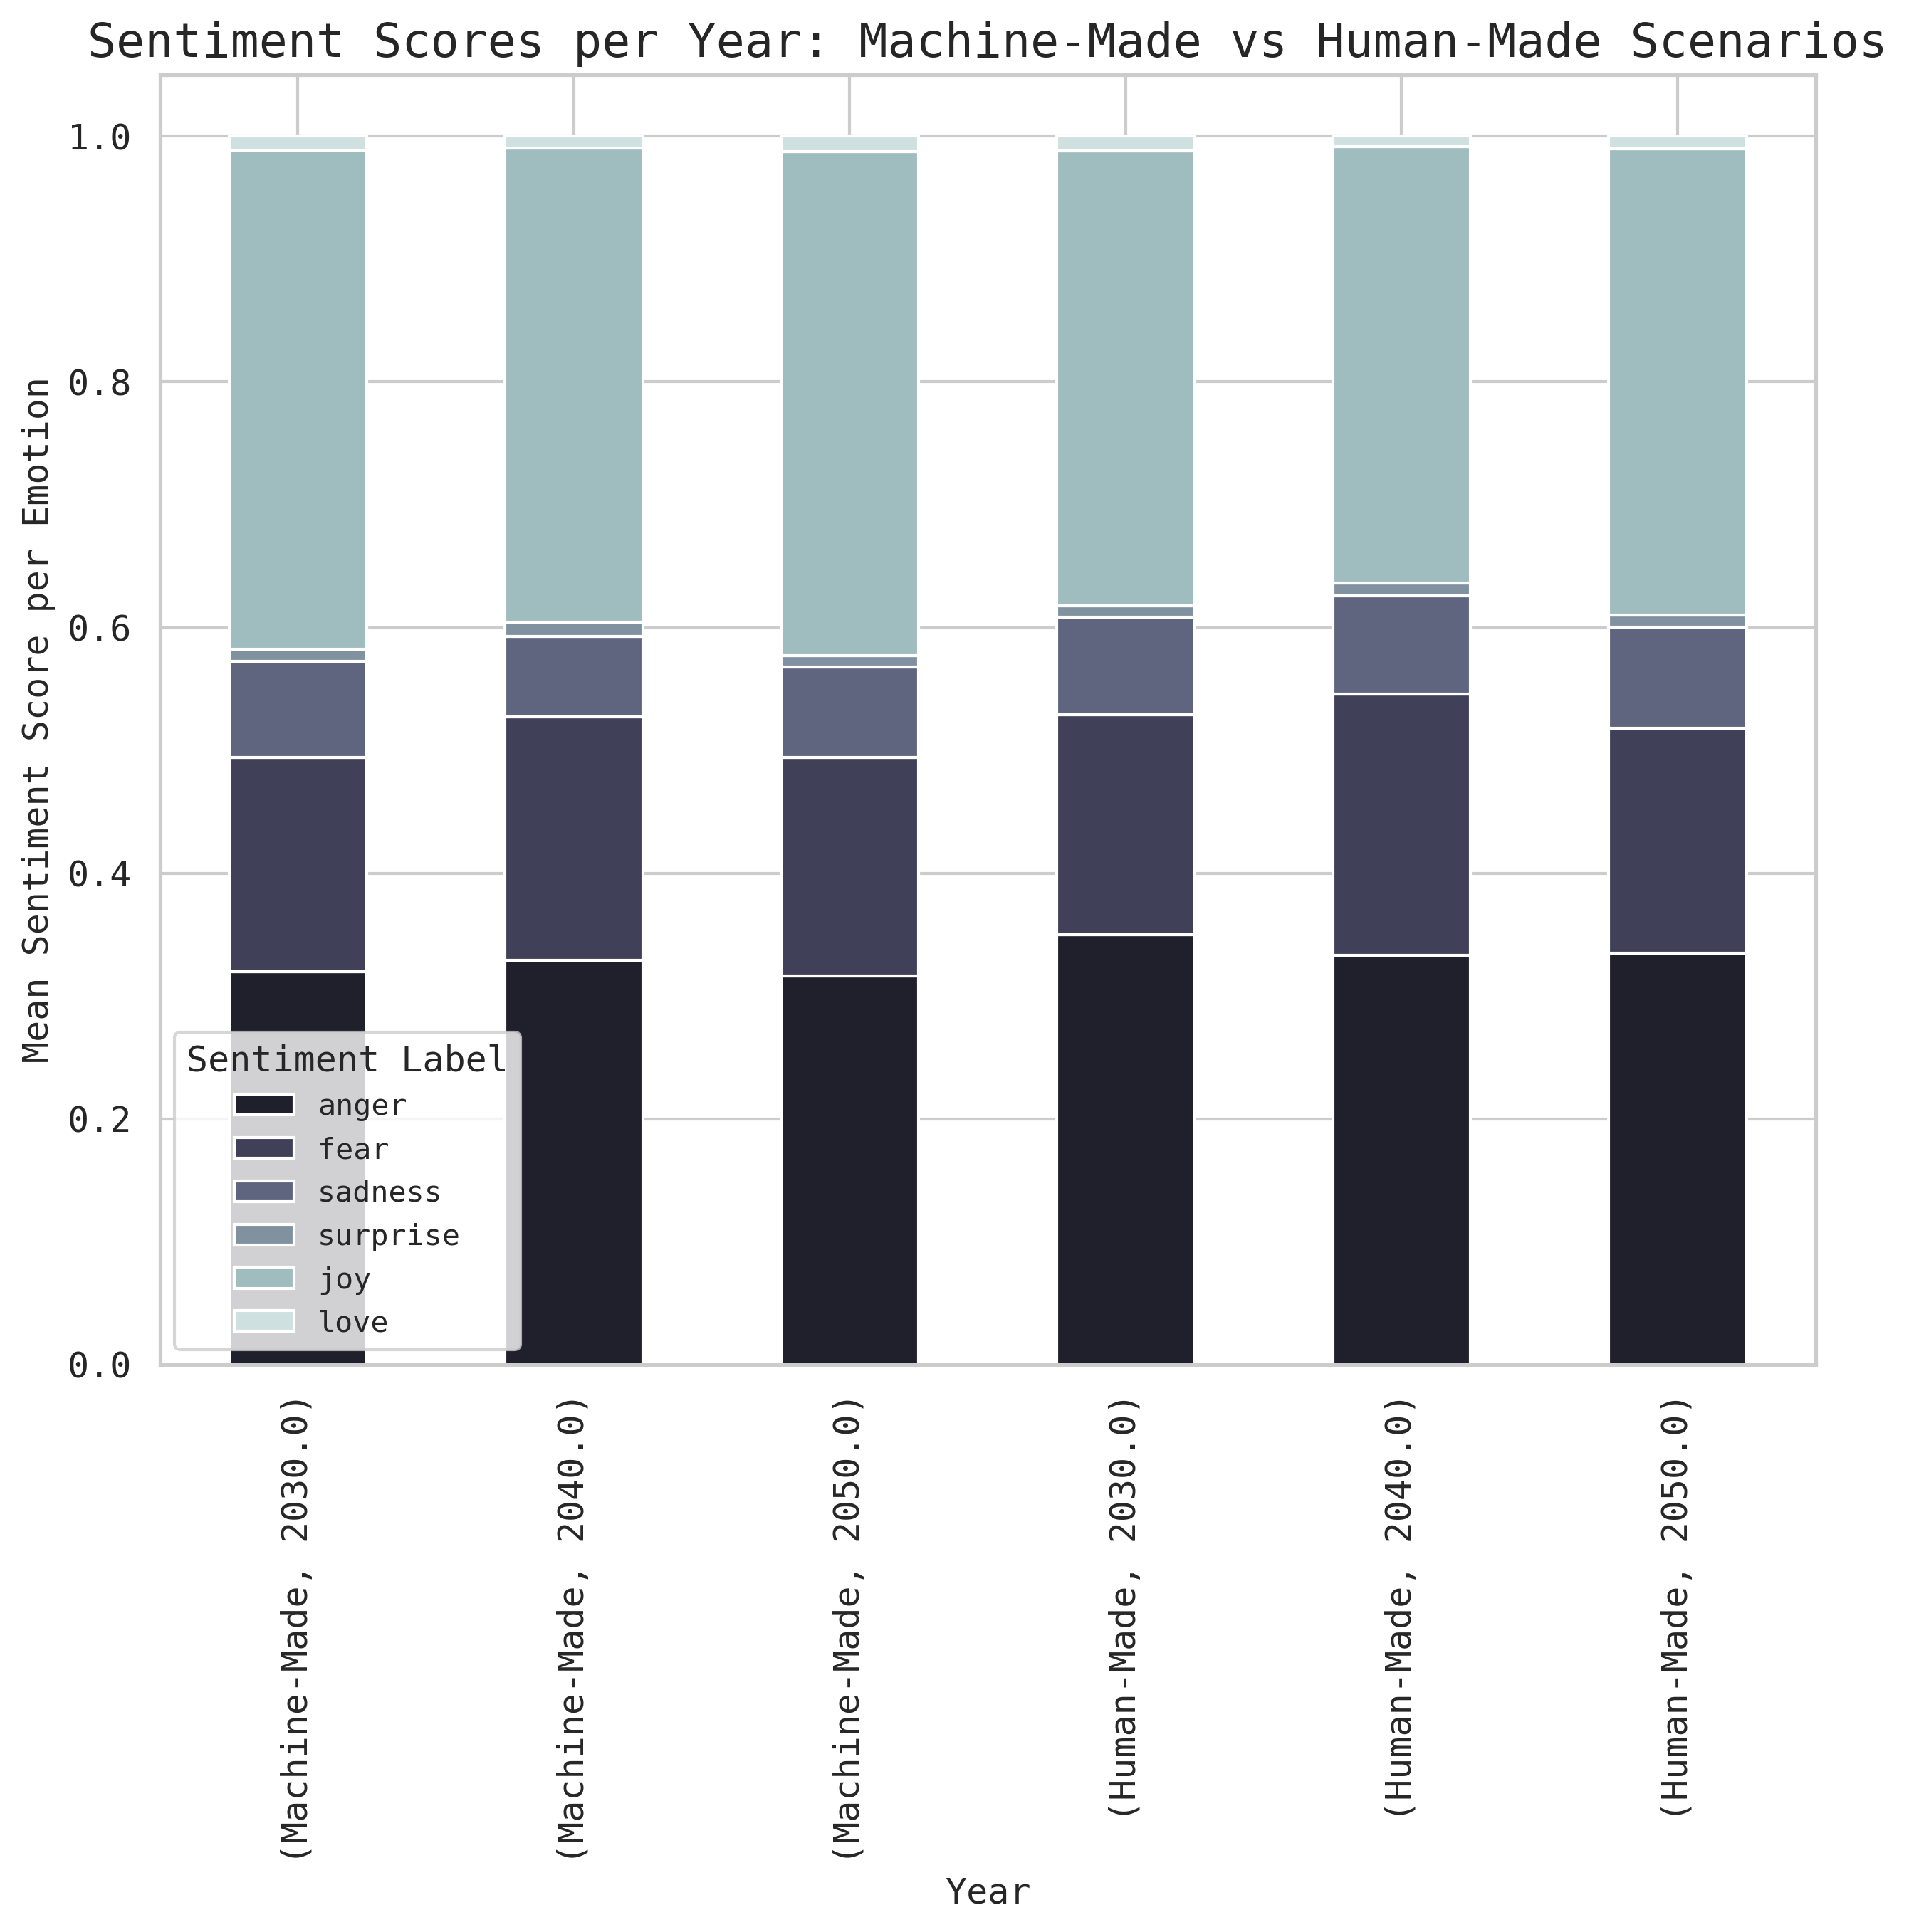

In [71]:
visualize_grouped_sentiments(ss_emotions, hs_emotions)

## T-Test per Sentiment

In [1]:
import pandas as pd
from scipy.stats import ttest_ind

In [13]:
hs_sadness = hs_emotions['sadness']
ss_sadness = ss_emotions['sadness']

t_stat, p_val = ttest_ind(hs_sadness, ss_sadness, equal_var=False)

print("P-value: ", p_val)

P-value:  0.03480152631157553


In [14]:
hs_fear = hs_emotions['fear']
ss_fear = ss_emotions['fear']

t_stat, p_val = ttest_ind(hs_fear, ss_fear, equal_var=False)

print("P-value: ", p_val)

P-value:  0.49692251015450173


In [15]:
hs_anger = hs_emotions['anger']
ss_anger = ss_emotions['anger']

t_stat, p_val = ttest_ind(hs_anger, ss_anger, equal_var=False)

print("P-value: ", p_val)

P-value:  8.350110130358627e-05


P-value: 0,00008350110130358627

In [17]:
hs_surprise = hs_emotions['surprise']
ss_surprise = ss_emotions['surprise']

t_stat, p_val = ttest_ind(hs_surprise, ss_surprise, equal_var=False)

print("P-value: ", p_val)

P-value:  0.810260566637475


In [18]:
hs_joy = hs_emotions['joy']
ss_joy = ss_emotions['joy']

t_stat, p_val = ttest_ind(hs_joy, ss_joy, equal_var=False)

print("P-value: ", p_val)

P-value:  0.00021182488510050525


In [19]:
hs_love = hs_emotions['love']
ss_love = ss_emotions['love']

t_stat, p_val = ttest_ind(hs_love, ss_love, equal_var=False)

print("P-value: ", p_val)

P-value:  0.945508642133821
